# Auswertung Adliswil

# Vorbereitung

Zuerst importiere ich die nötigen Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

Ich setze die Option, dass ich später in den Dataframes alle Angaben sehe. Warnungen, dass gewisse Funktionen nach Updates nicht mehr funktionieren könnten, schalte ich aus.

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

Danach importiere ich die beiden Listen, die ich brauche. Jene mit den Vorstössen und jene mit den Namen und Parteien der Politiker/innen.

In [3]:
path = "All_Datas/daten_adliswil.csv"
df= pd.read_csv(path)

In [4]:
path2 = "All_Datas/Parlamentarier_Adliswil.csv"
df_parlamentarier = pd.read_csv(path2)

Damit ich die beiden Listen später mergen kann, muss ich aus den Listen in der Spalte Namen-neu des Vorstoss-Dataframes die einzelnen Elemente herausziehen. Ich will also eine separate Zeile für jede Person, die an einem Vorstoss beteilitgt war. Dazu mache ich eine Kopie des Dataframes, um nichts zu überschreiben. Danach zerteile ich mit der lambda-Funktion die Liste in einzelne Elemente. Und zwar immer dann, wenn ein Komma kommt. Mit der Funktion .explode teile ich die definierten Namen in der Liste schliesslich in einzelne Zeilen auf.

In [5]:
df.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],['Senn Mario'],1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']","['Mäder Gabriel', 'Schanz Simon', 'Stefan Neubert', 'Anke Würl', 'Martin Rüttimann', 'Walter Uebersax']",2
2,Zwischennutzung Stadthausareal,Postulat,Überwiesen,2011-09-07,[' Clesle Hanspeter'],['Clesle Hanspeter'],3


In [6]:
df_vorstoesse = df.copy()

df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].apply(lambda x: x if pd.isna(x) else x.split(','))
df_vorstoesse = df_vorstoesse.explode('Namen-neu')
df_vorstoesse.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],['Senn Mario'],1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",['Mäder Gabriel',2
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",'Schanz Simon',2


Nun habe ich für alle Personen, die an einem Vorstoss beteiligt waren, eine einzelne Zeile. Um sie mit der Namensliste mergen zu können, müssen die Namen identisch sein. Ich muss also noch sämtliche Klammern und Anführungszeichen eliminieren. Das mache ich mit Hilfe von Regex.

In [25]:
df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].str.replace(r"[\[\]']|''", '').str.strip()
df_vorstoesse.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Städtische Beteiligung an Unternehmungen,Postulat,Abgeschrieben,2014-11-21,[' Senn Mario'],Senn Mario,1
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",Mäder Gabriel,2
1,ZKB Jubiläums-Dividende,Interpellation,Beantwortet,2019-11-06,"[' Mäder Gabriel', ' Schanz Simon', '', 'Stefan Neubert (Mitunterzeichner/in)\n Anke Würl (Mitunterzeichner/in)\n Martin Rüttimann (Mitunterzeichner/in)\n Walter Uebersax (Erstunterzeichner/in)', '', '', '']",Schanz Simon,2


Als nächstes will ich die beiden Listen so zusammenfügen, dass ich mit den IDs der Politiker und der Vorstösse arbeiten kann. So kann ich verhindern, dass sich Fehler einschleichen, falls zwei Politiker/innen gleich heissen. Ich merge die beiden Listen zur df_ID.

In [8]:
df_ID = df_vorstoesse.merge(df_parlamentarier, left_on='Namen-neu', right_on='Name', how='left')[['ID-Vorstoss', 'ID-Politiker']]

In [26]:
df_ID.head(5)

,ID-Vorstoss,ID-Politiker
0,1,91
1,2,62
2,2,86
3,2,96
4,2,6


Jetzt habe ich die Grundlage geschaffen, um mit den konkreten Auswertungen beginnen zu konnen.

## 1. Welche Parteien reichen am häufigsten Vorstösse ein?

Als erstes merge ich die Dataframes df_ID und df_parlamentarier so, dass ich die Parteien pro Vorstoss sehe.

In [27]:
df_parteien = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','ID-Vorstoss']]
df_parteien.head(5)

,Partei,ID-Vorstoss
0,FDP,1
1,GLP,2
2,Die Mitte,2
3,GLP,2
4,Die Mitte,2


Danach gruppiere ich die Daten und schaue, dass es dank der Funktion .nunique() die Partei nur einmal zählt, wenn mehrere Politiker/innen der selben Partei an einem Vorstoss beteiligt sind. Ich will hier ja wissen, welche Partei - und nicht welche Person - wie oft an einem Vorstoss beteiligt war. Technisch gesehen, zähle ich also eigentlich die Anzahl verschiedener Vorstoss-IDs, an denen eine Partei beteiligt war.

In [11]:
partei_count = df_parteien.groupby('Partei')['ID-Vorstoss'].nunique().sort_values(ascending=False).reset_index()
partei_count.columns = ['Partei', 'Anzahl_Vorstoesse']
partei_count

,Partei,Anzahl_Vorstoesse
0,SP,64
1,FDP,58
2,FW,35
3,Die Mitte,33
4,SVP,27
5,Grüne,25
6,EVP,22
7,GLP,14


Nun will ich das Resultat in einem Säulendiagramm plotten. Dies auch gleich mit den entsprechenden Parteifarben.

In [12]:
partei_farben = {
    'SP': 'red',
    'FDP': 'blue',
    'FW': 'grey',
    'Die Mitte': 'orange',
    'SVP': 'yellow',
    'EVP': 'gold',
    'Grüne': 'lime',
    'GLP': 'darkgreen'
}

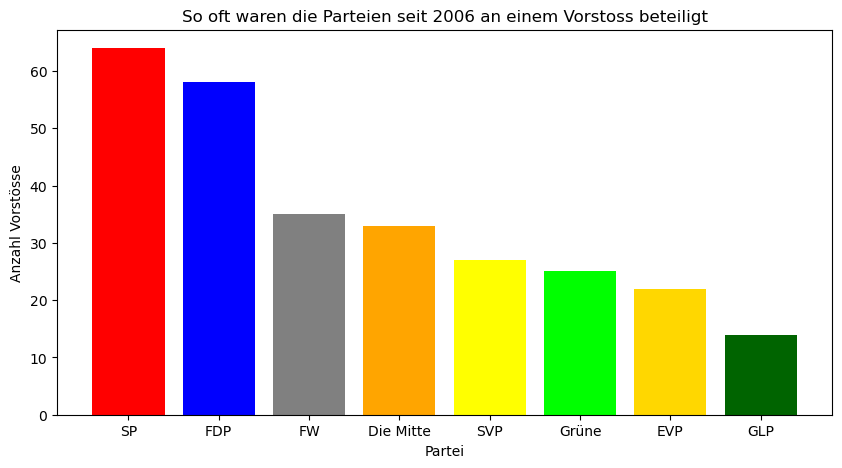

In [13]:
plt.figure(figsize=(10,5))
plt.bar(partei_count['Partei'], partei_count['Anzahl_Vorstoesse'], color=[partei_farben[partei] for partei in partei_count['Partei']])
plt.title('So oft waren die Parteien seit 2006 an einem Vorstoss beteiligt')
plt.xlabel('Partei')
plt.ylabel('Anzahl Vorstösse')
plt.show()

SP und FDP waren also am meisten an Vorstössen beteiligt. Um das etwas einordnen zu können, will ich auch die Anzahl Sitze der Parteien im Parlament ausfindig machen. Diese sind unter www.adliswil.ch/wahlen ersichtlich. Ich habe aus diesen Daten das csv-File "Parteistärke_Adliswil" gemacht und importiere es nun.

In [14]:
path = "All_Datas/Parteistärke_Adliswil.csv"
df_parteistaerke = pd.read_csv(path)
df_parteistaerke.set_index('Jahr', inplace=True)
df_parteistaerke.head(10)

,Die Mitte,EVP,FDP,FW,GLP,Grüne,SP,SVP
Jahr,,,,,,,,
2006,5,2,6,5,0,0,10,8
2010,4,2,6,4,0,2,8,10
2014,5,2,6,4,0,2,7,10
2018,4,2,6,4,2,3,7,8
2022,4,2,6,4,3,4,6,7


In [15]:
parteistaerke_durchschnitt = df_parteistaerke.mean().sort_values(ascending=False)
parteistaerke_durchschnitt

SVP          8.6
SP           7.6
FDP          6.0
Die Mitte    4.4
FW           4.2
Grüne        2.2
EVP          2.0
GLP          1.0
dtype: float64

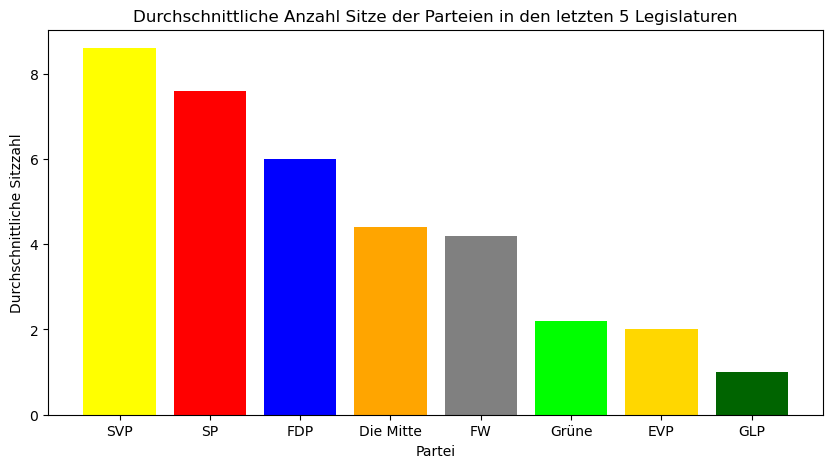

In [16]:
plt.figure(figsize=(10,5))
plt.bar(parteistaerke_durchschnitt.index, parteistaerke_durchschnitt.values, color=[partei_farben[partei] for partei in parteistaerke_durchschnitt.index])
plt.title('Durchschnittliche Anzahl Sitze der Parteien in den letzten 5 Legislaturen')
plt.xlabel('Partei')
plt.ylabel('Durchschnittliche Sitzzahl')
plt.show()

Ich möchte nun auf einen Blick erkennbar machen, dass die SVP zwar am meisten Sitze hat, jedoch vergleichsweise nur sehr wenig Vorstösse einreicht. Um beide Auswertungen in einer Grafik anzuzeigen, verwende ich subplots. 

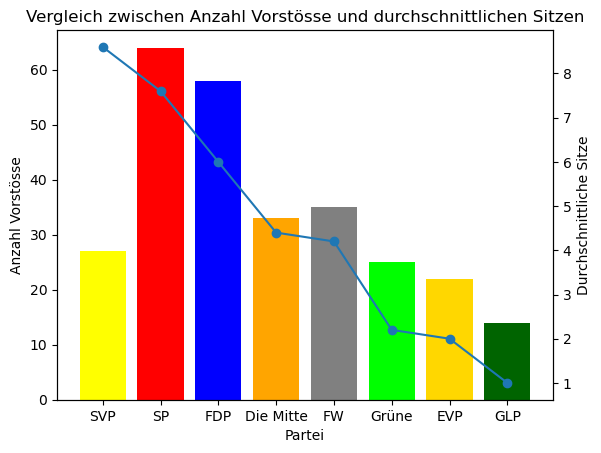

In [24]:
# Zuerst definiere ich die art der Grafik und die erste Achse - und sage, dass es noch eine zweite gibt.
fig, ax1 = plt.subplots()

# Hier definiere ich die Achse mit den durchschnittlichen Sitzen - es soll eine Linie mit Markern sein
# Weil ich auf den y-Achsen zwei verschieden grosse Werte habe, brauche ich unterschiedliche Skalen.
ax2 = ax1.twinx()
# Die Linie soll blau sein
color = 'tab:blue'
# Ich definiere den Titel der Achse
ax2.set_ylabel('Durchschnittliche Sitze')
# Nun definiere ich, was es mir eigentlich anzeigen soll - und dass ich einen blauen, runden Marker will
ax2.plot(parteistaerke_durchschnitt.index, parteistaerke_durchschnitt, color=color, marker='o')

# Hier definiere ich die Achse mit der Anzahl Vorstössen. Die Farben sollen den Parteien entsprechen
color = [partei_farben[partei] for partei in partei_count['Partei']]
# Ich definiere die Achsen
ax1.set_xlabel('Partei')
ax1.set_ylabel('Anzahl Vorstösse')
# Und sage auch hier, was es mir eigentlich anzeigen soll. Die Anzahl Vorstösse nach Partei.
ax1.bar(partei_count['Partei'], partei_count['Anzahl_Vorstoesse'], color=color)

# Zum Schluss setze ich noch einen Titel
plt.title('Vergleich zwischen Anzahl Vorstösse und durchschnittlichen Sitzen')
plt.show()

Mich interessiert als Nächstes, wie oft eine Partei alleine einen Vorstoss einreicht und wie oft Politiker/innen aus mehreren Parteien an einem Vorstoss beteiligt sind. Ich erstelle dazu ein neues Dataframe mit den Spalten "Einzeln" und "Zusammen" und definiere als erstes einen For-Loop für die Parteien. Dazu reduziere ich mit .unique() zuerst sämtliche doppelte Partei-Vorstoss-Kombinationen. Danach schaue ich, ob die Vorstoss-ID nur einmal vorkommt. Das heisst nämlich, dass nur eine Partei beteiligt ist - wenn sie mehrmals vorkommt, sind noch andere Parteien vorhanden.

In [18]:
df_beteiligung_parteien = pd.DataFrame(columns=['Partei', 'Einzeln', 'Zusammen'])

for partei in df_parteien['Partei'].unique():
    einzel = 0
    zusammen = 0

    for vorstoss_id in df_parteien[df_parteien['Partei'] == partei]['ID-Vorstoss'].unique():
        if len(df_parteien[df_parteien['ID-Vorstoss'] == vorstoss_id]) == 1:
            einzel += 1
        else:
            zusammen += 1

    df_beteiligung_parteien = df_beteiligung_parteien.append({'Partei': partei, 'Einzeln': einzel, 'Zusammen': zusammen}, ignore_index=True)

df_beteiligung_parteien

,Partei,Einzeln,Zusammen
0,FDP,23,35
1,GLP,1,13
2,Die Mitte,10,23
3,EVP,9,13
4,SP,29,35
5,FW,5,30
6,SVP,9,18
7,Grüne,3,22


Man könnte nun auch noch analysieren, welche Partei wie oft welche Art von Vorstoss einreicht. Ich verzichte darauf, weil Begrifflichkeiten wie Postulat, Interpellation oder Motion zu weit weg von den durchschnittlichen Leserinnen und Lesern sind und die Aussagekraft einer solchen Analyse nicht wirklich gross ist.

## 2. Wie erfolgreich sind die Parteien mit ihren Vorstössen?

Hier dann noch die Mehrheiten der Lager definieren.

## 3. Welches sind die "fleissigsten" Parlamentarier - und wie erfolgreich sind sie?

## 4. Wie viele Vorstösse stammen von Männern und wie viele von Frauen?

Ich füge als erstes die Dataframes df_ID und df_parlamentarier zusammen.

In [19]:
df_geschlechter = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','Geschlecht','ID-Vorstoss']]
df_geschlechter.head(5)

,Partei,Geschlecht,ID-Vorstoss
0,FDP,m,1
1,GLP,m,2
2,Die Mitte,m,2
3,GLP,m,2
4,Die Mitte,w,2


Danach zähle ich, welches Geschlecht wie oft vorkommt...

In [40]:
geschlechter_counts = df_geschlechter['Geschlecht'].value_counts()
geschlechter_counts

m    344
w     90
Name: Geschlecht, dtype: int64

...und stelle die prozentualen Anteile in einem einfachen Kuchendiagramm dar.

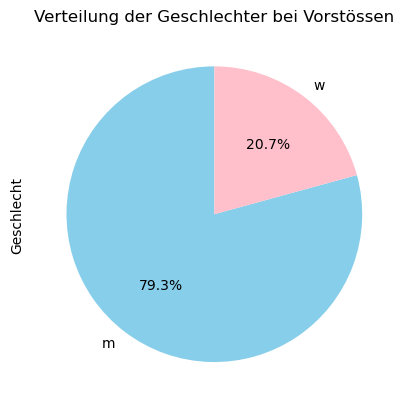

In [42]:
geschlechter_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Verteilung der Geschlechter bei Vorstössen')
plt.show()

Wir sehen also, dass nur an jedem fünften Vorstoss eine Frau beteiligt ist. Um etwas mehr als das aussagen zu können, möchte ich die Anzahl Vorstösse nach Geschlechter auf die einzelnen Parteien herunterbrechen.

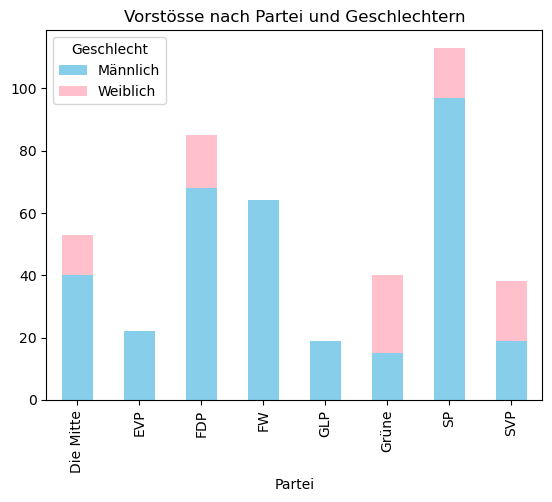

In [46]:
df_geschlechter.groupby(['Partei', 'Geschlecht']).count().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'pink'])
plt.title('Vorstösse nach Partei und Geschlechtern')
plt.legend(title='Geschlecht', labels=['Männlich', 'Weiblich'], loc='upper left')
plt.show()

Nun will ich die generelle Frauenquote der einzelnen Parteien im Parlament ermitteln. Dazu gruppiere ich das Dataframe df_parlamentarier zuerst nach Partei und Geschlect und suche dann mit der lambda Methode alle "w" heraus und berechne den Anteil mal 100, um auf die Prozente zu kommen.

In [22]:
df_geschlechtsanteil_partei = df_parlamentarier.groupby('Partei')['Geschlecht'].apply(lambda x: (x == 'w').mean() * 100).reset_index()
df_geschlechtsanteil_partei.columns = ['Partei', 'Anteil Frauen']
df_geschlechtsanteil_sortiert = df_geschlechtsanteil_partei.sort_values(['Anteil Frauen'],ascending=False)
df_geschlechtsanteil_sortiert

,Partei,Anteil Frauen
5,Grüne,50.000000
6,SP,38.095238
4,GLP,33.333333
2,FDP,26.315789
0,Die Mitte,25.000000
1,EVP,20.000000
7,SVP,15.384615
3,FW,10.000000


Das Ganze lasse ich mir wiederum in einer Grafik anzeigen. Interessant ist, dass die SP zwar einen relativ hohen Frauenanteil im Parlament hat, an den Vorstössen aber in der Regel Männer beteiligt sind.

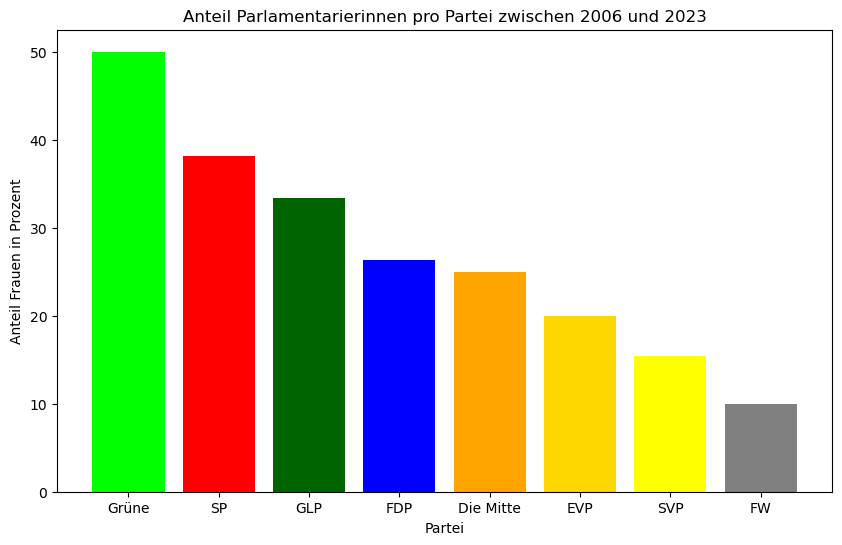

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(df_geschlechtsanteil_sortiert ['Partei'], df_geschlechtsanteil_sortiert ['Anteil Frauen'], color=[partei_farben[partei] for partei in df_geschlechtsanteil_sortiert['Partei']])
plt.title('Anteil Parlamentarierinnen pro Partei zwischen 2006 und 2023')
plt.xlabel('Partei')
plt.ylabel('Anteil Frauen in Prozent')
plt.show()